### Pricing Options

As we have mentionned before, there are European and American/Asian options. We differentiate them by the moment we exercise our right of action. European is at the expiry date, American/Asian is before or at the expiry date.

<a id='payoff'></a>

We can calculate the payoff of an option by subtracting its price at expiry by its strike price (the price at which our contract let's us take action).  

For a call option (we buy a stock at price $K$):  
$Payoff = \max({S_T - K ,\;0})$  

For a put option (we sell a stock at price $K$):  
$Payoff = \max({K - S_T ,\;0})$  

Those are for European options.

In [1]:
# call option
S_T, K = 120, 100
payoff_call = max(S_T - K, 0)
payoff_call

20

In [2]:
# put option
S_T, K = 80, 100
payoff_put = max(K - S_T, 0)
payoff_put

20

### Discounting

So we know how much we profit at a given moment, but because we do, instead of just holding the cash and waiting for the expiry date or a good profit, we invest our money in a risk free account, around 3%.  
That would be nice, right? But option sellers cancel out this 'side investment' by introducing a "benefit of time" in the option's price.  

Recall $\lim_{n \to \infty} \left(1+\dfrac{r}{n}\right)^n = e$ and from this we derive $A = Pe^{rt}$ where $A$ is our amount in the future and $P$ is our initial amount.  

We then find $P = Ae^{-rt}$. So option sellers use the $e^{-rt}$ term to scale down the payoff to remove the time-value of placing money in a risk free investment.  



An important distinction to make when using $r$ is that it should be used as the stock drift $\mu$ in the simulator. To be closer to textbook risk-neutral pricing, we would use $\mu = r$ in the simulator.

In [3]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [4]:
from src.pricer import MonteCarloPricer
from src.simulator import StockPriceSimulator

In [5]:
simulator = StockPriceSimulator(s0=100, mu=0.05, sigma=0.2, T=1, n_steps=252, n_sims=10000)
pricer = MonteCarloPricer(simulator)

call_price = pricer.price_call(K=100)
call_price

{'option_price': 10.770757382349409,
 'future_price': 11.098775778755261,
 'std_error': 0.15242142860842023,
 'discount_factor': 0.9704455335485082,
 'model': 'gbm',
 'n_sims': 10000}

Let's see what happens when we change the amount of simulations

In [6]:
simulator1000 = StockPriceSimulator(s0=100, mu=0.05, sigma=0.2, T=1, n_steps=252, n_sims=1000)
pricer1000 = MonteCarloPricer(simulator1000)

call_price_1000 = pricer1000.price_call(K=100)
call_price_1000

{'option_price': 10.669778886232717,
 'future_price': 10.994722029600009,
 'std_error': 0.48232835231065524,
 'discount_factor': 0.9704455335485082,
 'model': 'gbm',
 'n_sims': 1000}

In [7]:
simulator100_000 = StockPriceSimulator(s0=100, mu=0.05, sigma=0.2, T=1, n_steps=252, n_sims=100000)
pricer100_000 = MonteCarloPricer(simulator100_000)

call_price_100_000 = pricer100_000.price_call(K=100)
call_price_100_000

{'option_price': 10.694625860855426,
 'future_price': 11.020325707255008,
 'std_error': 0.04784159903945033,
 'discount_factor': 0.9704455335485082,
 'model': 'gbm',
 'n_sims': 100000}

While I first thought we would profit $option\_price - future\_price$, we actually don't profit, we are just growing our $\approx 10.70\$$ option contract to be worth $\approx 11.00\$$ at a rate of 3% in 1 year (252 trading days).  
We may only profit if the stock performs better than the volatility and drift parameters we put in our simulator, i.e. the stock grows faster than $\mu = 5\%$ or it swings ($\sigma$) more than $20\%$. Remember that if we let a contract expire, we only lose the premium, but the _price_ of the option never goes below $0$, meaning you aren't buying an option at $-1.00\$$  

Therefore, we only profit when the stock itself outperforms our model's assumption. This factor that is not related to the market/model is called ___alpha___ ($\alpha$).

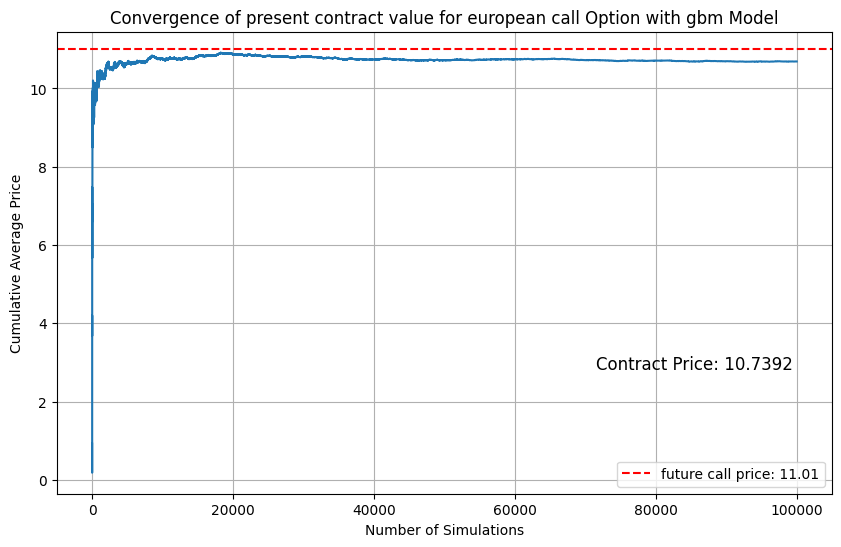

In [8]:
pricer100_000.plot_price_convergence(K=100, T=1, option_type='european', model='gbm', contract='call')

### Summary for pricing options

When we want to price an option contract for a stock, we simulate many thousands of random walks for that stock.  
We take each terminal stock price ($S_{T=1}$) and substitute it in our [payoff formula](#payoff). To each of the payoffs — there are $n$ simulations of payoffs, lowest value of a payoff is 0 — we apply a [discounting factor](#discounting) to account for the time value of money (if we had invested it with a risk free rate $\approx 3\%$). We take the mean of the list of the discounted payoffs, giving us the value of contract in the present. If we took our payoffs, before applying the discount, and took the mean, it gives us the value of the contract in the future.  

This only really applies to European options & Asian options. Asian options depend on the average price of the stock over the contract period to its pretty similar to European options. American options on the other hand require a much more complicated pricing method as 

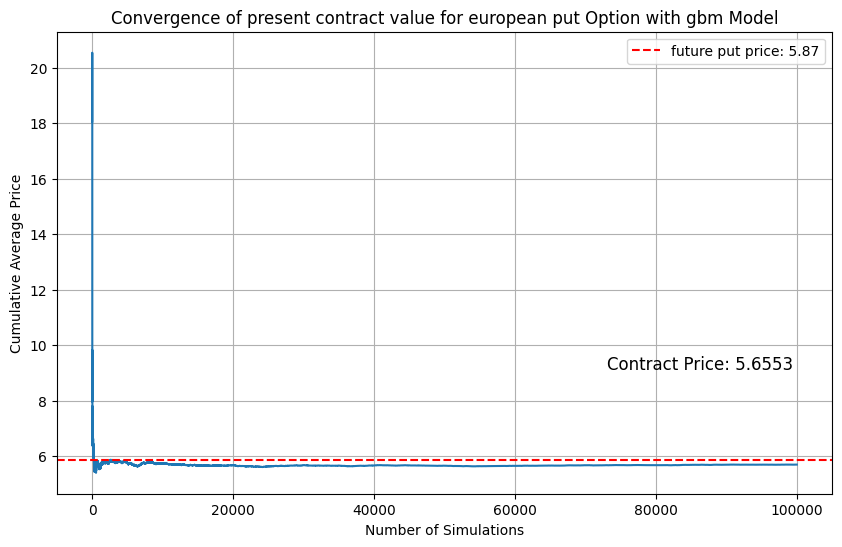

In [9]:
pricer100_000.plot_price_convergence(K=100, T=1, option_type='european', model='gbm', contract='put')